In [1]:
import sys

sys.path.append("../../")
from src.dataset.utils.mapping import generate_mapping, generate_hierarchical_mapping
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from src.dataset.dbpedia import DBPediaDataset

/home/infres/dfouchard-21/G-Retriever/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = torch.load("sampled_dataset.pt")
labels = dataset["class"]
unique_labels = np.unique(labels)

In [5]:
with open("split/train_indices.txt", "r") as f:
    train_size = len(f.readlines())

with open("split/val_indices.txt", "r") as f:
    val_size = len(f.readlines())

with open("split/test_indices.txt", "r") as f:

    test_size = len(f.readlines())

print(f"Train size: {train_size}")
print(f"Val size: {val_size}")
print(f"Test size: {test_size}")

Train size: 4704
Val size: 1008
Test size: 1009


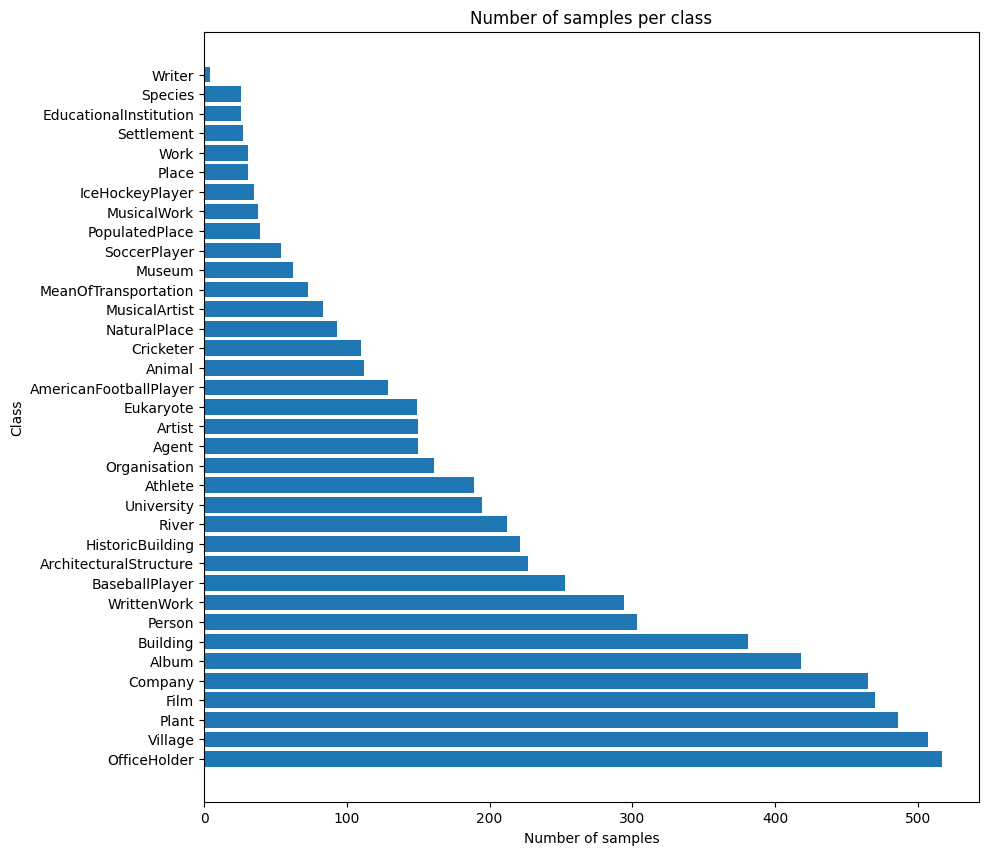

In [ ]:
samples_per_class = {k: 0 for k in unique_labels}
for label in labels:
    samples_per_class[label] += 1

# Create ranked dataframes
sorted_samples_per_class = sorted(
    samples_per_class.items(), key=lambda x: x[1], reverse=True
)
sorted_classes = [x[0] for x in sorted_samples_per_class]
sorted_classes = [x.split("/")[-1] for x in sorted_classes]
sorted_samples = [x[1] for x in sorted_samples_per_class]

# Plot
plt.figure(figsize=(10, 10))
plt.barh(sorted_classes, sorted_samples)
plt.xlabel("Number of samples")
plt.ylabel("Class")
plt.title("Number of samples per class")
plt.show()

Text(0, 0.5, 'Cumulative sum of samples')

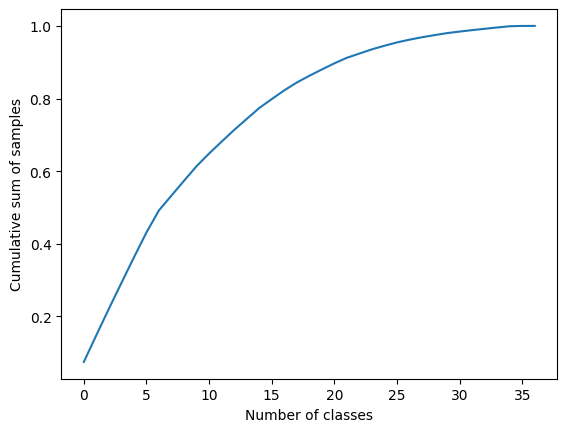

In [ ]:
# Plot cumulative sum of samples
cumulative_samples = np.cumsum(sorted_samples) / len(entities)
plt.plot(cumulative_samples)
plt.grid()
plt.xlabel("Number of classes")
# Line at 80% of the samples
plt.axhline(y=0.8, color="r", linestyle="--")
# X line at 80% of the classes
plt.axvline(x=np.where(cumulative_samples > 0.8)[0][0], color="r", linestyle="--")
plt.ylabel("Cumulative sum of samples")